In [1]:
import os
import numpy as np
import json
from detectron2.structures import BoxMode
from detectron2.config import get_cfg
from detectron2.data import get_detection_dataset_dicts
from detectron2.utils.visualizer import Visualizer
from detectron2.data import MetadataCatalog
import matplotlib.pyplot as plt
from PIL import Image

from detectron2 import model_zoo
from detectron2.data.datasets import register_coco_instances
import detectron2.data.detection_utils as utils

Reproduce Tutorial
----

In [4]:
from detectron2.engine import DefaultPredictor

cfg = get_cfg()
cfg.merge_from_file(model_zoo.get_config_file("COCO-InstanceSegmentation/mask_rcnn_R_50_FPN_3x.yaml"))
cfg.MODEL.ROI_HEADS.SCORE_THRESH_TEST = 0.5  # set threshold for this model
# Find a model from detectron2's model zoo. You can use the https://dl.fbaipublicfiles... url as well
cfg.MODEL.WEIGHTS = model_zoo.get_checkpoint_url("COCO-InstanceSegmentation/mask_rcnn_R_50_FPN_3x.yaml")
predictor = DefaultPredictor(cfg)

In [ ]:
predictor.model.backbone.fpn_lateral2.weight

In [ ]:
!wget http://images.cocodataset.org/val2017/000000439715.jpg -O input.jpg
im = utils.read_image("./input.jpg", None)

In [ ]:
outputs = predictor(im['image'])

In [ ]:
v = Visualizer(im['image'], MetadataCatalog.get(cfg.DATASETS.TRAIN[0]), scale=1.2)
v = v.draw_instance_predictions(outputs["instances"].to("cpu"))
plt.figure()
plt.imshow(v.get_image())
plt.show()

COCO
-----

In [5]:
dataset_dicts = get_detection_dataset_dicts(
        cfg.DATASETS.TRAIN,
        filter_empty=cfg.DATALOADER.FILTER_EMPTY_ANNOTATIONS,
        min_keypoints=cfg.MODEL.ROI_KEYPOINT_HEAD.MIN_KEYPOINTS_PER_IMAGE
        if cfg.MODEL.KEYPOINT_ON
        else 0,
        proposal_files=cfg.DATASETS.PROPOSAL_FILES_TRAIN if cfg.MODEL.LOAD_PROPOSALS else None,
    )

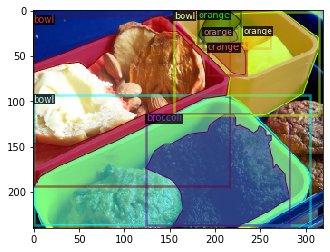

In [14]:
#Visualize GT
for i, sample in enumerate(dataset_dicts):
    im = utils.read_image(sample['file_name'], None)

    visualizer = Visualizer(im['image'], MetadataCatalog.get(cfg.DATASETS.TRAIN[0]), scale=0.5)
    vis = visualizer.draw_dataset_dict(sample)
    plt.figure()
    plt.imshow(vis.get_image())
    plt.show()
    
    break


In [15]:
# Prediction
outputs = predictor(im['image'])

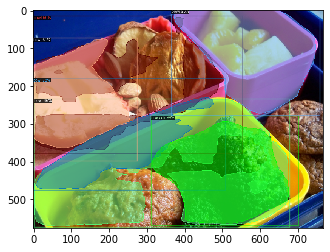

In [16]:
v = Visualizer(im['image'], MetadataCatalog.get(cfg.DATASETS.TRAIN[0]), scale=1.2)
v = v.draw_instance_predictions(outputs["instances"].to("cpu"))
plt.figure()
plt.imshow(v.get_image())
plt.show()

In [17]:
im['image'].shape

(480, 640, 3)

SUNRGBD RGB-Only
----

In [2]:
cfg = get_cfg()
cfg.merge_from_file('configs/COCO-InstanceSegmentation/RGBD_mask_rcnn_R_50_FPN_3x_sunrgbd.yaml')
cfg.DATALOADER.NUM_WORKERS = 1

for d in ["train", "val"]:
    register_coco_instances("sunrgbd_{}".format(d), {}, "datasets/SUNRGBD/annotations/instances_{}.json".format(d), "datasets/SUNRGBD/images/", "datasets/SUNRGBD/images/")


In [19]:
dataset_dicts = get_detection_dataset_dicts(
        cfg.DATASETS.TRAIN,
        filter_empty=cfg.DATALOADER.FILTER_EMPTY_ANNOTATIONS,
        min_keypoints=cfg.MODEL.ROI_KEYPOINT_HEAD.MIN_KEYPOINTS_PER_IMAGE
        if cfg.MODEL.KEYPOINT_ON
        else 0,
        proposal_files=cfg.DATASETS.PROPOSAL_FILES_TRAIN if cfg.MODEL.LOAD_PROPOSALS else None,
    )


Category ids in annotations are not in [1, #categories]! We'll apply a mapping for you.



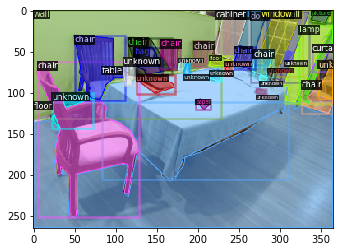

In [20]:
#Visualize GT
for i, sample in enumerate(dataset_dicts):
    im = utils.read_image(sample['file_name'], None)

    visualizer = Visualizer(im['image'], MetadataCatalog.get(cfg.DATASETS.TRAIN[0]), scale=0.5)
    vis = visualizer.draw_dataset_dict(sample)
    plt.figure()
    plt.imshow(vis.get_image())
    plt.show()
    
    break


In [21]:
# Prediction
outputs = predictor(im['image'])

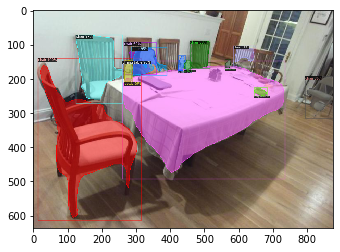

In [22]:
v = Visualizer(im['image'], MetadataCatalog.get('coco_2017_train'), scale=1.2)
v = v.draw_instance_predictions(outputs["instances"].to("cpu"))
plt.figure()
plt.imshow(v.get_image())
plt.show()

SUNRGBD With Depth
-----

In [3]:
from detectron2.engine import DefaultTrainer

os.makedirs(cfg.OUTPUT_DIR, exist_ok=True)
trainer = DefaultTrainer(cfg)
trainer.resume_or_load(resume=False)
trainer.train()

[01/16 15:25:38 d2.engine.defaults]: Model:
GeneralizedRCNN(
  (backbone): FPN(
    (fpn_lateral2): Conv2d(256, 256, kernel_size=(1, 1), stride=(1, 1))
    (fpn_output2): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (fpn_lateral3): Conv2d(512, 256, kernel_size=(1, 1), stride=(1, 1))
    (fpn_output3): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (fpn_lateral4): Conv2d(1024, 256, kernel_size=(1, 1), stride=(1, 1))
    (fpn_output4): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (fpn_lateral5): Conv2d(2048, 256, kernel_size=(1, 1), stride=(1, 1))
    (fpn_output5): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (top_block): LastLevelMaxPool()
    (bottom_up): ResNet(
      (stem): BasicStem(
        (conv1): Conv2d(
          4, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False
          (norm): FrozenBatchNorm2d(num_features=64, eps=1e-05)
        )
      )
      (res

WARNING [01/16 15:25:38 d2.data.datasets.coco]: 
Category ids in annotations are not in [1, #categories]! We'll apply a mapping for you.

[01/16 15:25:38 d2.data.datasets.coco]: Loaded 1115 images in COCO format from datasets/SUNRGBD/annotations/instances_train.json
[01/16 15:25:38 d2.data.build]: Removed 0 images with no usable annotations. 1115 images left.
[01/16 15:25:38 d2.data.build]: Distribution of instances among all 38 categories:
|  category  | #instances   |   category    | #instances   |  category   | #instances   |
|:----------:|:-------------|:-------------:|:-------------|:-----------:|:-------------|
|  unknown   | 7955         |     wall      | 2896         |    floor    | 1754         |
|  cabinet   | 389          |      bed      | 358          |    chair    | 3002         |
|    sofa    | 319          |     table     | 1238         |    door     | 546          |
|   window   | 791          |   bookshelf   | 70           |   picture   | 326          |
|  counter   | 

RuntimeError: CUDA out of memory. Tried to allocate 254.00 MiB (GPU 0; 23.88 GiB total capacity; 22.36 GiB already allocated; 60.00 MiB free; 951.07 MiB cached)